In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# ÂÆö‰πâÂõ†Â≠êÔºÅ

In [12]:
def momentum_adjusted_smart_money(df, window=60, rsi_period=14):
    """
    Âü∫‰∫éÂä®ÈáèÊïàÂ∫îÁöÑËÅ™ÊòéÈí±Âõ†Â≠ê
    - ‰ΩøÁî®RSI‰Ωú‰∏∫Âä®ÈáèÊåáÊ†áÔºåÂ¢ûÂº∫Âõ†Â≠êÈ¢ÑÊµãËÉΩÂäõ
    """
    close = df['close']
    taker_volume = df['taker_buy_volume']
    rsi = ta.rsi(close, length=rsi_period)
    
    price_diff = close.diff()
    taker_ratio = taker_volume / df['volume'].replace(0, 1e-12)
    
    gain = (price_diff * taker_ratio).where(price_diff > 0, 0)
    loss = (-price_diff * (1 - taker_ratio)).where(price_diff < 0, 0)
    
    sum_gain = gain.rolling(window).sum()
    sum_loss = loss.rolling(window).sum()
    
    # Âä®ÈáèË∞ÉÊï¥ÔºöRSIÊ†áÂáÜÂåñÂà∞[-1, 1]
    momentum_factor = (rsi - 50) / 50
    factor = (sum_gain - sum_loss) * (1 + momentum_factor)
    
    return factor

# Âõ†Â≠êÊµãËØï

In [13]:
evaluator.set_factor(
    factor_func=momentum_adjusted_smart_money,
    factor_name='momentum_adjusted_smart_money'
)


üìä ÂçïÂ∏ÅÁßç (single) ËØ¶ÁªÜËØÑ‰º∞ÁªìÊûú:
--------------------------------------------------
üîó Áõ∏ÂÖ≥ÊÄßÂàÜÊûê:
   IC (Pearson): 0.007300
   Rank_IC (Spearman): -0.026236
üìä ‰ø°ÊÅØÊØîÁéá:
   IR: -0.072852
   ÊúâÊïàÂàÜÁªÑÊï∞: 10
üìä Âõ†Â≠êÂàÜÂ∏É:
üìã Êï∞ÊçÆÊ¶ÇÂÜµ:
   Êï∞ÊçÆÈïøÂ∫¶: 130763
   Âõ†Â≠êÂàó: momentum_adjusted_smart_money
   Êî∂ÁõäÁéáÂàó: future_return
   Êú™Êù•Êî∂ÁõäÂë®Êúü: 10
--------------------------------------------------

üñºÔ∏è  ÂçïÂ∏ÅÁßç (single) ÂõæÁâáÂ±ïÁ§∫:
----------------------------------------
üìä ÊòæÁ§∫ÂàÜÁªÑÂàÜÊûêÂõæ...


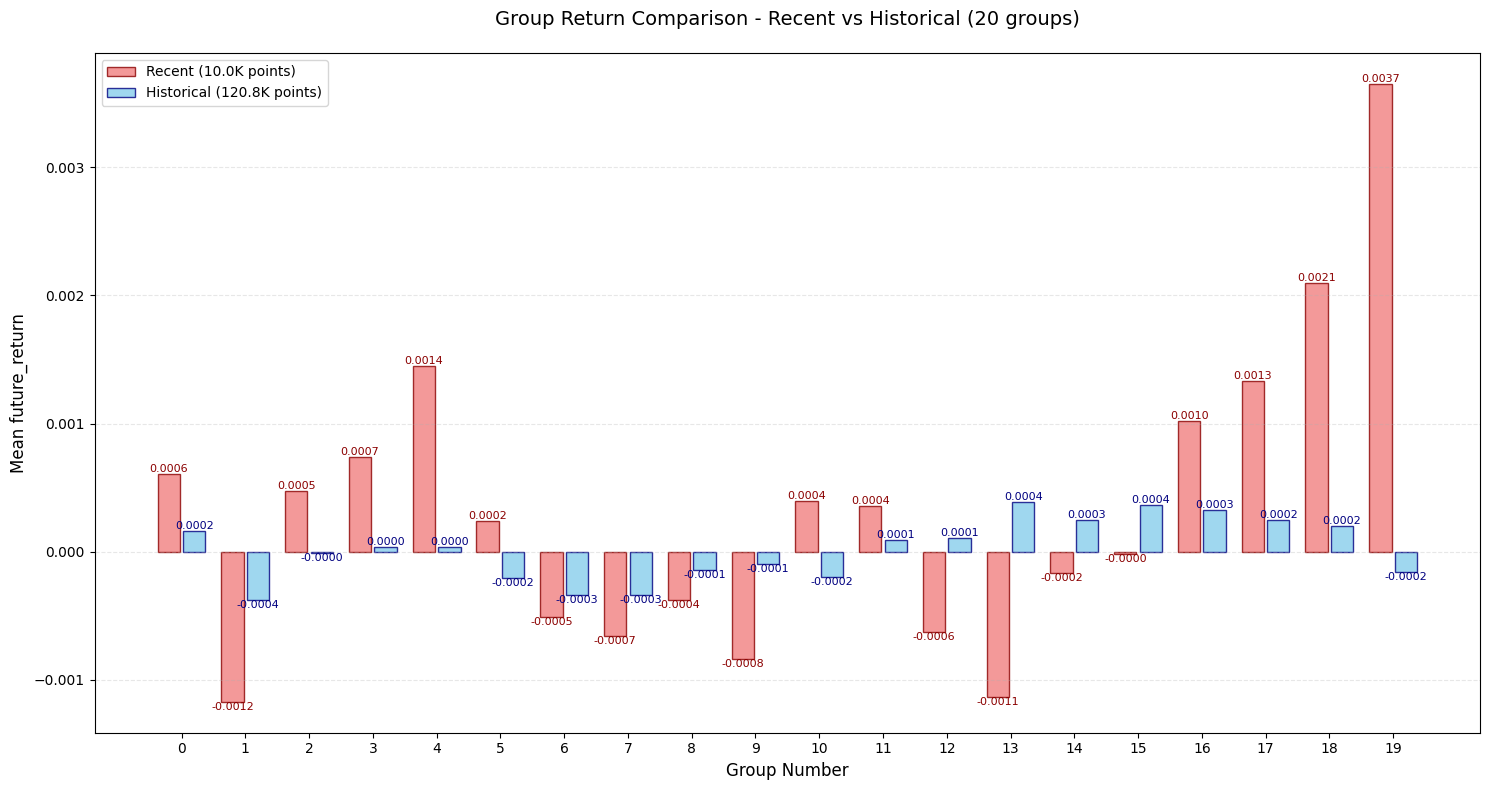

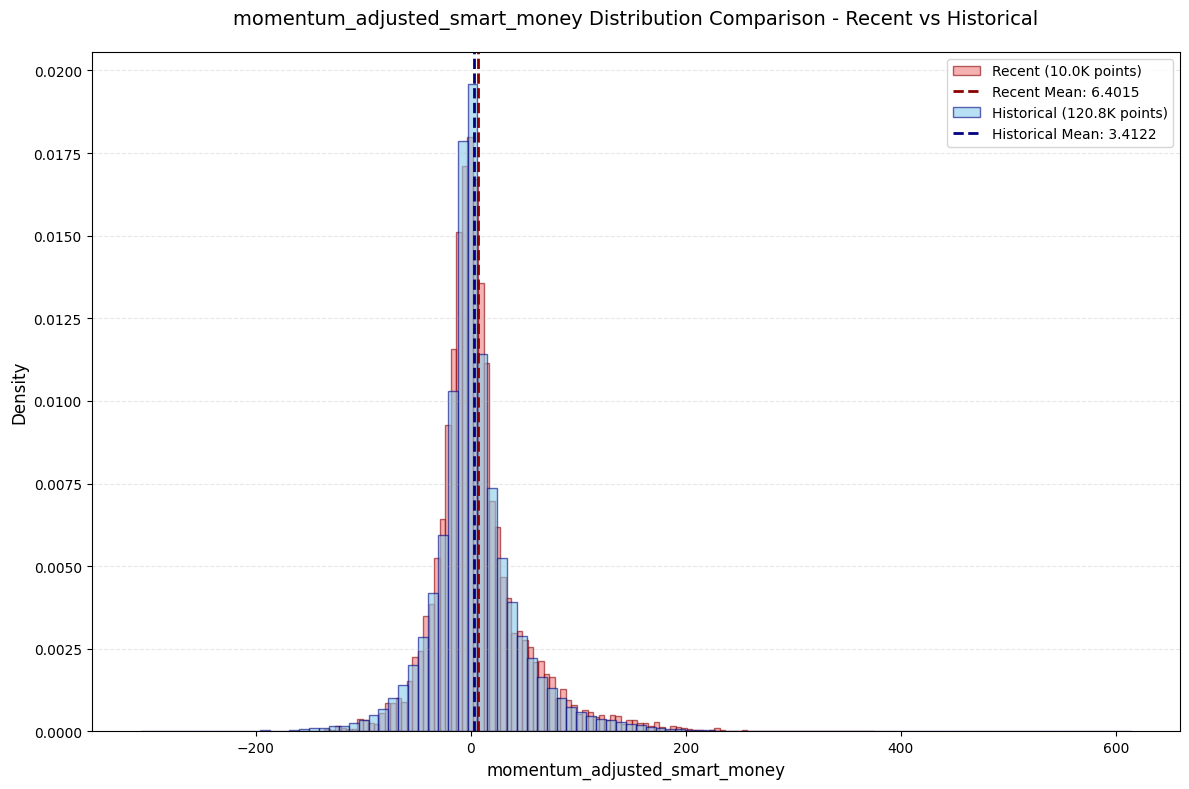

üìà ÊòæÁ§∫Âõ†Â≠êÂàÜÂ∏ÉÂõæ...
‚úÖ Â∑≤ÊòæÁ§∫ 2 ‰∏™ÂõæÁâá
----------------------------------------


In [14]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)

In [15]:
print(result)

{'correlation_analysis': {'IC': 0.007299602171571996, 'Rank_IC': -0.026235724570716823}, 'information_ratio': {'IR': -0.0728516125303734, 'group_correlations': [-0.03335409129703547, -0.008075343746000007, -0.0034186033152798544, -0.00038881999942206994, -0.006299508129642032, 0.013931329436398746, 0.007257233328931703, 0.00484525523375759, 0.004162842937369056, 0.011977549803428326], 'n_groups': 10}, 'group_analysis': {'group_stats':         val_min  val_max  val_mean  return_mean  return_std  count
group                                                             
0     -306.7529 -55.5063  -86.3304       0.0002      0.0183   6539
1      -55.5051 -37.0974  -45.1610      -0.0004      0.0151   6538
2      -37.0832 -26.5674  -31.5441       0.0000      0.0132   6538
3      -26.5655 -19.4984  -22.7835       0.0001      0.0127   6538
4      -19.4980 -14.5613  -16.9052       0.0002      0.0109   6538
5      -14.5609 -10.8216  -12.6194      -0.0002      0.0108   6538
6      -10.8211  -7.6896 